# Frod
## 1. 데이터 확인

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

In [2]:
file_path = './data/'
train_fn ='FordA_TRAIN.arff'
test_fn = 'FordA_TEST.arff'

In [3]:
def read_ariff(path):
    
    raw_data, meta = loadarff(path)
    cols = [x for x in meta]
    data2d = np.zeros([raw_data.shape[0],len(cols)])
    for i,col in zip(range(len(cols)),cols):
        data2d[:,i]=raw_data[col]
    return data2d

In [4]:
train = read_ariff(file_path + train_fn)
test = read_ariff(file_path + test_fn)

data = np.concatenate((train, test), axis=0)
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0


In [5]:
df.shape

(4921, 501)

## 2. EDA

In [6]:
# 상관관계 확인 --> 데이터가 너무 많아서 히트맵은 못그림
corr = df.corr()
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
corr

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,1.000000,0.954423,0.822322,0.622421,0.385677,0.144447,-0.077252,-0.265860,-0.416212,-0.529767,...,-0.012600,-0.018467,-0.023099,-0.025823,-0.025997,-0.023516,-0.018694,-0.012333,-0.005425,-0.001798
1,0.954423,1.000000,0.952987,0.818321,0.618418,0.384680,0.146304,-0.074912,-0.265217,-0.419107,...,-0.009324,-0.016344,-0.022216,-0.026320,-0.027900,-0.026675,-0.022786,-0.016907,-0.010106,-0.000179
2,0.822322,0.952987,1.000000,0.952374,0.818324,0.621339,0.389996,0.151150,-0.073028,-0.267673,...,-0.005471,-0.012955,-0.019416,-0.024362,-0.027024,-0.027015,-0.024339,-0.019493,-0.013519,0.002418
3,0.622421,0.818321,0.952374,1.000000,0.952968,0.821350,0.626552,0.394791,0.153205,-0.074534,...,-0.002424,-0.009199,-0.015078,-0.019842,-0.022891,-0.023831,-0.022574,-0.019336,-0.014971,0.005078
4,0.385677,0.618418,0.818324,0.952968,1.000000,0.953907,0.823774,0.628798,0.395187,0.151540,...,-0.000935,-0.005737,-0.009807,-0.013313,-0.015991,-0.017518,-0.017735,-0.016491,-0.014291,0.006737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.023516,-0.026675,-0.027015,-0.023831,-0.017518,-0.008905,0.000470,0.008713,0.014109,0.015841,...,0.122233,0.366955,0.604706,0.808644,0.949194,1.000000,0.948881,0.807286,0.604859,0.006853
497,-0.018694,-0.022786,-0.024339,-0.022574,-0.017735,-0.010492,-0.002186,0.005520,0.010907,0.013008,...,-0.112377,0.111490,0.354476,0.595339,0.804717,0.948881,1.000000,0.950583,0.815771,0.005096
498,-0.012333,-0.016907,-0.019493,-0.019336,-0.016491,-0.011381,-0.005009,0.001332,0.006073,0.008161,...,-0.306513,-0.120148,0.102057,0.347812,0.594072,0.807286,0.950583,1.000000,0.953320,0.001835
499,-0.005425,-0.010106,-0.013519,-0.014971,-0.014291,-0.011581,-0.007436,-0.002763,0.001066,0.002943,...,-0.453497,-0.309476,-0.122776,0.103133,0.354688,0.604859,0.815771,0.953320,1.000000,-0.001546


### +

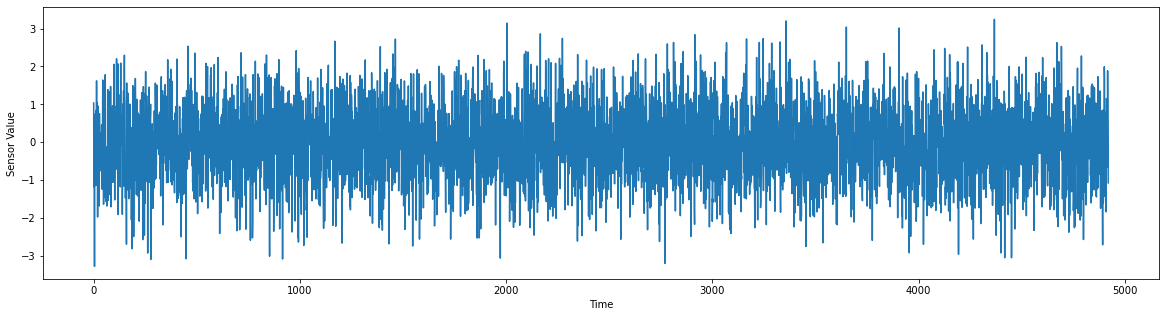

In [7]:
# 센서 데이터 확인
sensor = np.random.randint(0, 500)

plt.figure(figsize = (20, 5))
plt.plot(df.iloc[:, sensor])
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()

## 3. 학습

In [8]:
df[500].value_counts()

-1.0    2527
 1.0    2394
Name: 500, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop([500], axis=1)
y = df[500]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3444, 500)
(1477, 500)
(3444,)
(1477,)


### 3-1. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_accu = accuracy_score(y_test, lr_pred)

print("Accuracy:", lr_accu)
print(classification_report(y_test, lr_pred))

Accuracy: 0.5016926201760324
              precision    recall  f1-score   support

        -1.0       0.52      0.52      0.52       767
         1.0       0.48      0.48      0.48       710

    accuracy                           0.50      1477
   macro avg       0.50      0.50      0.50      1477
weighted avg       0.50      0.50      0.50      1477



### 3-2. XGBoost

In [12]:
# pip install xgboost

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_accu = accuracy_score(y_test, xgb_pred)

print("Accuracy:", xgb_accu)
print(classification_report(y_test, xgb_pred))

[16:48:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7894380501015572
              precision    recall  f1-score   support

        -1.0       0.80      0.79      0.80       767
         1.0       0.78      0.79      0.78       710

    accuracy                           0.79      1477
   macro avg       0.79      0.79      0.79      1477
weighted avg       0.79      0.79      0.79      1477



### 3-3. LSTM

In [149]:
# 확장
X_train_exp = np.expand_dims(X_train, axis=-1)
X_test_exp = np.expand_dims(X_test, axis=-1)
print(X_train_exp.shape)
print(X_test_exp.shape)

(3444, 500, 1)
(1477, 500, 1)


In [15]:
# Label에서 Anomaly -1을 0으로 변환
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

print(y_train.shape)
print(y_test.shape)

(3444,)
(1477,)


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, Activation, Flatten
from keras.models import Sequential

model = Sequential()
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 이 경우에는 model.summary()가 안됨

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy']
             )

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5)

model.fit(X_train_re, y_train, batch_size=256, epochs=10, callbacks=[early_stop], validation_split=0.2, verbose=1)

Epoch 1/10
11/11 [==============================] - 21s 2s/step - loss: 0.7559 - sparse_categorical_accuracy: 0.6163 - val_loss: 0.6510 - val_sparse_categorical_accuracy: 0.5878
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 0.5761 - sparse_categorical_accuracy: 0.7074 - val_loss: 0.6026 - val_sparse_categorical_accuracy: 0.6633
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 0.5145 - sparse_categorical_accuracy: 0.7510 - val_loss: 0.6125 - val_sparse_categorical_accuracy: 0.6444
Epoch 4/10
11/11 [==============================] - 19s 2s/step - loss: 0.4643 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.6134 - val_sparse_categorical_accuracy: 0.6851
Epoch 5/10
11/11 [==============================] - 20s 2s/step - loss: 0.4059 - sparse_categorical_accuracy: 0.8138 - val_loss: 0.5668 - val_sparse_categorical_accuracy: 0.7199
Epoch 6/10
11/11 [==============================] - 19s 2s/step - loss: 0.3583 - sparse_categorical_accuracy: 

In [28]:
model.evaluate(X_test_re, y_test)

47/47 [==============================] - 5s 114ms/step - loss: 0.7696 - sparse_categorical_accuracy: 0.7563


[0.7695984244346619, 0.7562627196311951]

In [34]:
y_pred = model.predict(X_test_re).argmax(axis=-1)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       767
         1.0       0.77      0.70      0.74       710

    accuracy                           0.76      1477
   macro avg       0.76      0.75      0.75      1477
weighted avg       0.76      0.76      0.76      1477



In [ ]:
# 컴파일에 sparse를 사용하지 않는 경우 predict값이 0,1이 아닌 softmax의 확률값으로 나오기 때문에 argmax처리 해줘야함
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['sparse_categorical_accuracy']
#              )
# y_pred = model.predict(X_test_re).argmax(axis=-1)